In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import signal
from IPython import display
import time as timelib
from IPython.core.display import HTML 

In [3]:
session = tf.InteractiveSession()
optimizer = tf.train.AdamOptimizer(learning_rate=0.0005)

In [4]:
# http://nghiaho.com/?p=997
def arctan(x):
    return np.pi*x - x*(tf.abs(x) - 1)*(0.2447 + 0.0663*tf.abs(x));

In [5]:
display.Image(url= "http://i.imgur.com/KwwbyJy.png", width=600)

In [6]:
display.Image(url= "http://i.imgur.com/OUEpBSq.png", width=200)

In [7]:
display.Image(url= "http://i.imgur.com/aNLCAL6.png", width=200)

In [8]:
display.Image(url= "http://i.imgur.com/Lf9pWYa.png", width=200)

In [9]:
def car(dsteers):
    dt = 0.1
    a = 1.0
    b = 1.0
    v = 5
    
    dsteers = tf.unpack(dsteers)
    
    xs = []
    xds = []
    ys = []
    yaws = []
    steers = []
    
    x = tf.Variable(0.0)
    y = tf.Variable(0.0)
    yaw = tf.Variable(0.0)
    steer = tf.zeros_like(dsteers[0])
    
    for dsteer in dsteers:
        
        steer2 = arctan(a*tf.sin(steer)/tf.cos(steer)/b) # Homemade tan
        v0 = v * tf.cos(steer2)
        xd = v * tf.cos(steer2 + yaw)
        yd = v * tf.sin(steer2 + yaw)
        yawd = v0 * tf.sin(steer)/tf.cos(steer)/b # Homemade tan
        
        x = x + xd * dt
        y = y + yd * dt
        yaw = yaw + yawd * dt
        steer = steer + dsteer * dt
                
        xs.append(x)
        ys.append(y)
        yaws.append(yaw)
        steers.append(steer)
        xds.append(xd)
        
    return tf.pack(xs), tf.pack(ys), tf.pack(yaws), tf.pack(steers), tf.pack(xds)

In [10]:
dsteers = tf.Variable(tf.random_uniform([200,1],minval=-0.002, maxval=0.002))
xs, ys, yaws, steers, xds = car(dsteers)

In [11]:
y_target = 10.0
xd_target = 5.0
y_penalty = tf.abs(y_target-ys) # Penalty of current position compared to target
xd_penalty = tf.abs(xd_target-xds)
cf = tf.reduce_sum(tf.add(xd_penalty,y_penalty)) # Cost function

In [12]:
train_op = optimizer.minimize(cf,var_list=[dsteers])
session.run(tf.initialize_all_variables())

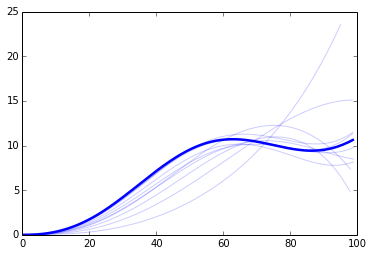

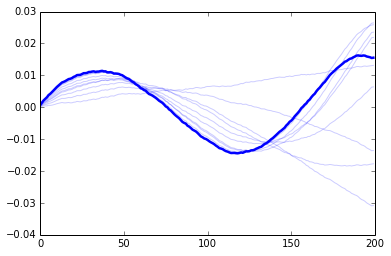

In [13]:
for i in range(0,100):
    _,error = session.run([train_op,cf], {})
    if (i % 10) == 0:
        print error
        x_opt, y_opt, steer_opt = session.run([xs,ys,steers], {})
        plt.figure(1)
        for l in plt.gca().lines:
            l.set_alpha(.2)
            l.set_linewidth(1)
        plt.plot(x_opt, y_opt,color='blue',linewidth=2.5)
        display.display(plt.gcf())
        plt.figure(2)
        for l in plt.gca().lines:
            l.set_alpha(.2)
            l.set_linewidth(1)
        plt.plot(steer_opt,color='blue',linewidth=2.5)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        timelib.sleep(0.1)